In [23]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
print(os.getcwd())


/Users/stepansusko/Programming/test_task


In [7]:
train_masks = pd.read_csv("/Users/stepansusko/Programming/test_task/data/airbus-ship-detection/train_ship_segmentations_v2.csv")
print(f'Training dataset contains {len(train_masks)} samples')

with_ships = train_masks[~train_masks.EncodedPixels.isna()].ImageId.unique()
without_ships = train_masks[train_masks.EncodedPixels.isna()].ImageId.unique()

print(len(with_ships), len(without_ships))

Training dataset contains 231723 samples
42556 150000


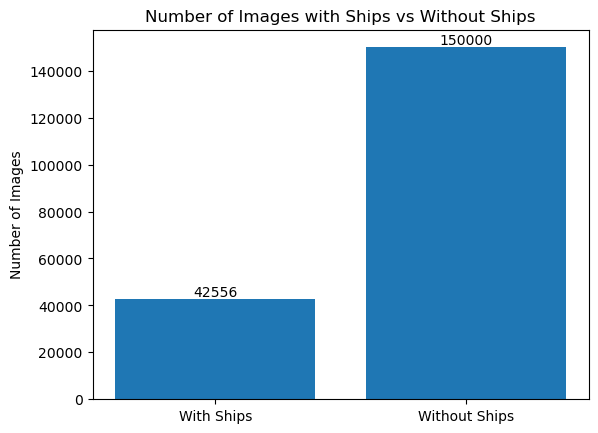

In [12]:
def visualize_if_ship():
    # Create a bar plot
    fig, ax = plt.subplots()
    ax.bar(['With Ships', 'Without Ships'], [len(with_ships), len(without_ships)])
    ax.set_ylabel('Number of Images')
    ax.set_title('Number of Images with Ships vs Without Ships')

    # Add labels on top of each bar
    for i, v in enumerate([len(with_ships), len(without_ships)]):
        ax.text(i, v, str(v), ha='center', va='bottom')

    plt.show()
visualize_if_ship()

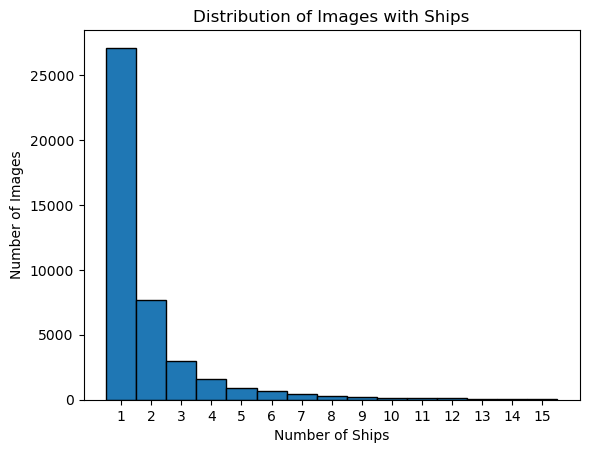

In [16]:
def visualize_ships_amount():
    # Count the number of images with ships for each unique image identifier
    ship_counts = train_masks[train_masks.ImageId.isin(with_ships)].groupby('ImageId').size()

    # Plot the distribution of images with ships
    fig, ax = plt.subplots()
    ax.hist(ship_counts, bins=range(1, max(ship_counts)+2), align='left', edgecolor='black')
    ax.set_xlabel('Number of Ships')
    ax.set_ylabel('Number of Images')
    ax.set_title('Distribution of Images with Ships')
    plt.xticks(range(1, max(ship_counts)+1))
    plt.show()

visualize_ships_amount()

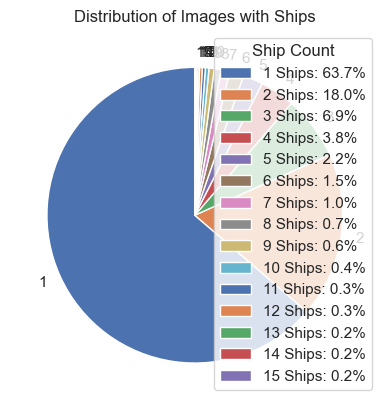

In [33]:
def visualize_ships_pie():
    # Count the number of images with ships for each unique image identifier
    ship_counts = train_masks[train_masks.ImageId.isin(with_ships)].groupby('ImageId').size()

    # Count the occurrences of each ship count
    count_counts = ship_counts.value_counts().sort_index()

    # Plot the distribution of images with ships as a pie chart
    plt.pie(count_counts, labels=count_counts.index, startangle=90)

    # Add a custom legend with the percentage for each ship count
    total = sum(count_counts)
    percentages = [f'{count/total*100:.1f}%' for count in count_counts]
    plt.legend(title='Ship Count', labels=[f'{i} Ships: {p}' for i, p in zip(count_counts.index, percentages)], loc='upper right')

    # Set the title
    plt.title('Distribution of Images with Ships')
    # Display the pie chart
    plt.show()

visualize_ships_pie()